<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/salaryhike_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [11]:
data=pd.read_csv("/content/Salary_Data (1).csv")

In [12]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


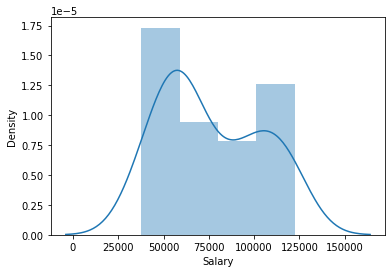

In [6]:
#correlation
sns.distplot(data['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


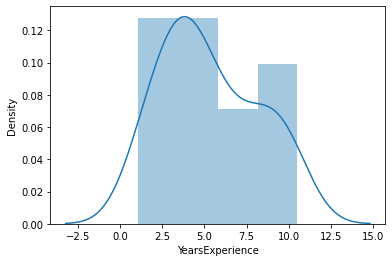

In [ ]:
sns.distplot(data['YearsExperience'])

In [ ]:
#fitting regression model
model=smf.ols("Salary~YearsExperience",data=data).fit()

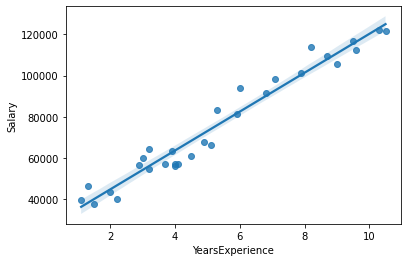

In [ ]:
sns.regplot(x="YearsExperience",y="Salary",data=data);

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [ ]:
#prediction of new model for salary hike
newdata=pd.Series([5.5,2,1])


In [ ]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [ ]:
model.predict(data_pred)

0    77766.992967
1    44692.124842
2    35242.162520
dtype: float64

In [16]:
import matplotlib.pyplot as plt

                            0             1
Intercept        19511.156989  32073.243408
YearsExperience   8403.364027  10496.560616


Text(0, 0.5, 'Salary')

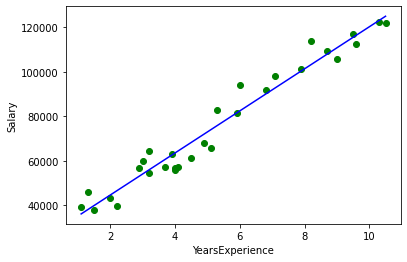

In [17]:
# Transforming variables for accuracy
model2 = smf.ols('Salary~YearsExperience',data=data).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred2 = model2.predict(pd.DataFrame(data['YearsExperience']))
pred2.corr(data.Salary)
# pred2 = model2.predict(wcat.iloc[:,0])
pred2
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green');plt.plot(data['YearsExperience'],pred2,color='blue');plt.xlabel('YearsExperience');plt.ylabel('Salary')


                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


Text(0, 0.5, 'Standardized Residual')

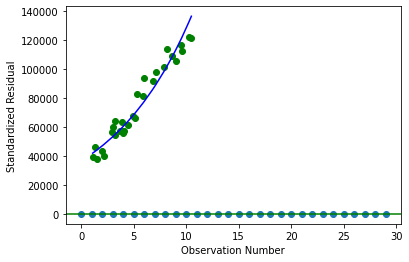

In [20]:

# Exponential transformation
model3 = smf.ols('np.log(Salary)~YearsExperience',data=data).fit()
model3.params
model3.summary()
print(model3.conf_int(0.01)) # 99% confidence level
pred_log = model3.predict(pd.DataFrame(data['YearsExperience']))
pred_log
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3
pred3.corr(data.Salary)
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='green');plt.plot(data.YearsExperience,np.exp(pred_log),color='blue');plt.xlabel('YearsExperience');plt.ylabel('Salary')
resid_3 = pred3-data.Salary
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

In [26]:

# Quadratic model
data["YearsExperience_Sq"] = data.YearsExperience*data.YearsExperience
model_quad = smf.ols("Salary~YearsExperience+YearsExperience_Sq",data=data).fit()
model_quad.params
model_quad.summary()
pred_quad = model_quad.predict(data.YearsExperience)

model_quad.conf_int(0.05) # 
plt.scatter(data.YearsExperience,wcat.Salary,c="b");plt.plot(data.YearsExperience,pred_quad,"r")

plt.scatter(np.arange(109),model_quad.resid_pearson);plt.axhline(y=0,color='red');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

plt.hist(model_quad.resid_pearson) # histogram for residual values 

############################### Implementing the Linear Regression model from sklearn library

from sklearn.linear_model import LinearRegression
import numpy as np
plt.scatter(data.YearsExperience,data.Salary)
model1 = LinearRegression()
model1.fit(data.YearsExperience.values.reshape(-1,1),data.Salary)
pred1 = model1.predict(data.YearsExperience.values.reshape(-1,1))
# Adjusted R-Squared value
model1.score(data.YearsExperience.values.reshape(-1,1),data.Salary)# 0.6700
rmse1 = np.sqrt(np.mean((pred1-data.Salary)**2)) # 32.760
model1.coef_
model1.intercept_

#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred1,(pred1-data.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300) 
# checking normal distribution for residual
plt.hist(pred1-data.Salary)

### Fitting Quadratic Regression 
data["YearsExperience_sqrd"] = data.YearsExperience*data.YearsExperience
model2 = LinearRegression()
model2.fit(X = data.iloc[:,[0,2]],y=data.Salary)
pred2 = model2.predict(data.iloc[:,[0,2]])
# Adjusted R-Squared value
model2.score(data.iloc[:,[0,2]],data.Salary)# 0.67791
rmse2 = np.sqrt(np.mean((pred2-data.Salary)**2)) # 32.366
model2.coef_
model2.intercept_
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred2,(pred2-data.Salary),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  
# Checking normal distribution
plt.hist(pred2-data.Salary)

PatsyError: ignored